### Principal Component Analysis (PCA) and the MCC ( Matthews Correlation Coefficient)
This notebook consists Principal Component Analysis (PCA) and Matthews Correlation Coefficient (MCC) for the Intersection Set Models on Gene Level and Differentially Present Gene Level while Predcting Multipartite and Unipartite Genomes using Machine Learning


Jupyter Notebook by: Janak Sunuwar

#### PCA and MCC for Gene-Level

In [14]:
#Importing the Intersection Data-Sets
level = 'Gene_Level'
# import GL Matrix
file_name = 'https://github.com/Janaksunuwar/Predicting-Multipartite-and-Unipartite-Bacterial-Genomes/raw/main/Data/Final_Multipartite_Gene_Level_Matrix.csv'

def MCC(level, file_name):
    import warnings
    import pandas as pd
    import numpy as np
    from sklearn import model_selection
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.ensemble import ExtraTreesClassifier
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.ensemble import BaggingClassifier
    from sklearn.metrics import roc_curve, roc_auc_score
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import f1_score
    from sklearn.metrics import auc
    from sklearn.metrics import precision_score, recall_score
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import matthews_corrcoef
    import matplotlib.pyplot as plt

    # Supress warnings
    warnings.filterwarnings('ignore')

    # Set seeds and configurations
    np.random.seed(1)
    
    #import intersection data-set
    consistent_genes = f'https://github.com/Janaksunuwar/Predicting-Multipartite-and-Unipartite-Bacterial-Genomes/raw/main/Data/2.Final_Consistent_Genes_Multipartite_{level}.csv'
    #read gene_ast matrix
    open_gene_ast = pd.read_csv(file_name)
    # read file to dataframe
    open_consistent_genes = pd.read_csv(consistent_genes)

    # make separate dataframe with just consistent genes
    target_genesTT = open_consistent_genes[['Feature']].rename(columns={'Feature': 'Consistent genes'})

    #No of top consistent genes
    num = 15
    target_genesTT = target_genesTT.iloc[:num, :]

    # sort the consistent genes 
    target_genesTT = target_genesTT.sort_values('Consistent genes')
    # adding antibiotic lable at the end
    target_genes_good = target_genesTT.append({'Consistent genes': 'Label'}, ignore_index=True)
    # converting consistent genes to a list
    column_list = target_genes_good['Consistent genes'].tolist()

    #ALL DATA
    #make gene, ast matrix consisting only of consistent genes 
    data = open_gene_ast[column_list]

    #select the features beside the label
    X = data.iloc[:, 1:-2] 
    #select the label/pehnotype column
    Y = data.iloc[:,-1]


    #create a dataframe for the final output of the program

    MCC_Test_Performance = pd.DataFrame(columns=[])

    #split the dataset into six equal parts
    kf = KFold(n_splits=6)
    i = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

        #Build model and evaluate models
        models = []
        models.append(('LogR', LogisticRegression()))
        models.append(('gNB', GaussianNB()))
        models.append(('SVM', SVC(kernel = 'rbf', probability=True)))
        models.append(('DT', DecisionTreeClassifier(criterion = 'entropy', random_state=1)))
        models.append(('RF', RandomForestClassifier(criterion = 'entropy', random_state=0)))
        models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
        models.append(('LDA', LinearDiscriminantAnalysis()))
        models.append(('mNB', MultinomialNB()))
        models.append(('ABC', AdaBoostClassifier()))
        models.append(('GBC', GradientBoostingClassifier()))
        models.append(('ETC', ExtraTreesClassifier()))
        models.append(('BC', BaggingClassifier()))

        #MCC Calculation
        myDF2 = pd.DataFrame(columns=[])
        for name, model in models:  
            model = model.fit(X_train, Y_train)
            Y_test_pred = model.predict(X_test)
            Te_MCC = matthews_corrcoef(Y_test, Y_test_pred)

            myDF2 = myDF2.append({'classifier': name, f'te_MCC{i+1}':Te_MCC}, ignore_index = True)
        MCC_Test_Performance = pd.concat([MCC_Test_Performance, myDF2], axis = 1)
        i +=1

    MCC_Test_Performance['MCC_avg'] = MCC_Test_Performance[MCC_Test_Performance.columns[1::2]].mean(axis=1).round(3)
    print(f"Matthews Correlation Coefficient for {level}")
    MCC = MCC_Test_Performance.iloc[:, [0,-1]]
    return MCC
MCC(level, file_name)

Matthews Correlation Coefficient for Gene_Level


,classifier,MCC_avg
0,LogR,0.619
1,gNB,0.583
2,SVM,0.619
3,DT,0.633
4,RF,0.708
5,KNN,0.787
6,LDA,0.477
7,mNB,0.359
8,ABC,0.532
9,GBC,0.741


In [21]:
level = 'DEG_Level'
# import matrix for Differentially Present Level

file_name = 'https://github.com/Janaksunuwar/Predicting-Multipartite-and-Unipartite-Bacterial-Genomes/raw/main/Data/Final_Multipartite_matrix_DEG_level.csv'


MCC(level, file_name)



Matthews Correlation Coefficient for DEG_Level


,classifier,MCC_avg
0,LogR,0.442
1,gNB,0.508
2,SVM,0.475
3,DT,0.331
4,RF,0.331
5,KNN,0.272
6,LDA,0.240
7,mNB,-0.200
8,ABC,0.377
9,GBC,0.409


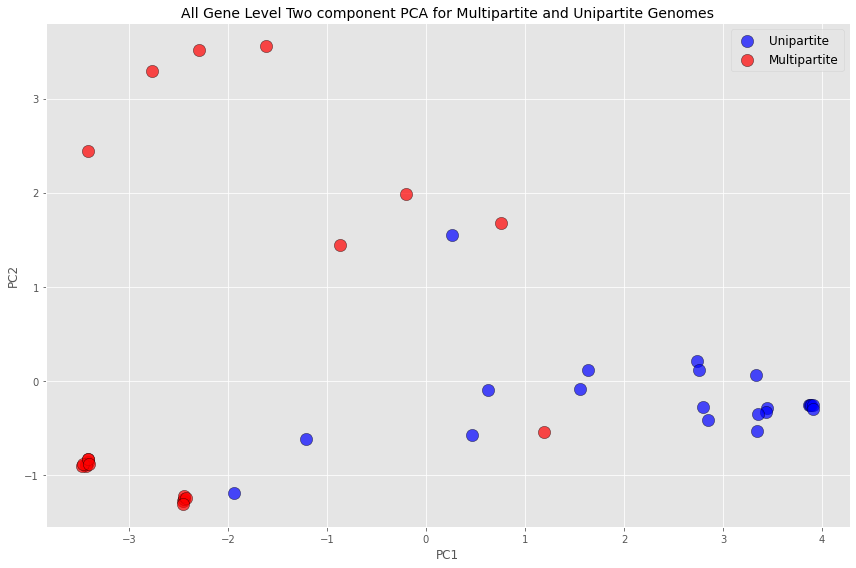

In [44]:
# PCA after feature reduction
#Importing the Intersection Data-Sets
level = 'Gene_Level'
caption = 'All Gene Level'
# import matrix for Gene Level 
file_name = 'https://github.com/Janaksunuwar/Predicting-Multipartite-and-Unipartite-Bacterial-Genomes/raw/main/Data/Final_Multipartite_Gene_Level_Matrix.csv'

def PCA(level, caption, file_name):
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt

    consistent_genes = f'https://github.com/Janaksunuwar/Predicting-Multipartite-and-Unipartite-Bacterial-Genomes/raw/main/Data/2.Final_Consistent_Genes_Multipartite_{level}.csv'
    #read gene_ast matrix
    open_gene_ast = pd.read_csv(file_name)
    # read file to dataframe
    open_consistent_genes = pd.read_csv(consistent_genes)

    # make separate dataframe with just consistent genes
    target_genesTT = open_consistent_genes[['Feature']].rename(columns={'Feature': 'Consistent genes'})

    #No of top consistent genes
    num = 15
    target_genesTT = target_genesTT.iloc[:num, :]

    # sort the consistent genes 
    target_genesTT = target_genesTT.sort_values('Consistent genes')
    # adding antibiotic lable at the end
    target_genes_good = target_genesTT.append({'Consistent genes': 'Label'}, ignore_index=True)
    # converting consistent genes to a list
    column_list = target_genes_good['Consistent genes'].tolist()

    #ALL DATA
    #make gene, ast matrix consisting only of consistent genes 
    data = open_gene_ast[column_list]

    # Separating out the features and labels
    features = data.columns[:-1]
    x = data.loc[:, features].values

    # Standardizing the features
    x = StandardScaler().fit_transform(x)

    # Define 2 compnents
    pca = PCA(n_components=2)

    # Apply PCA
    principalComponents = pca.fit_transform(x)

    # Convert to DataFrame
    principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

    # Concatenate with target label
    finalDf = pd.concat([principalDf, data[['Label']]], axis=1)

    # Adding a small jitter to data
    def jitter(data, amount=0.03):
        return data + np.random.randn(*data.shape) * amount

    finalDf['Jittered_PC1'] = jitter(finalDf['PC1'])
    finalDf['Jittered_PC2'] = jitter(finalDf['PC2'])

    # The rest remains the same, but plot using the jittered data
    plt.figure(figsize=(12,8))
    for label in [0, 1]:
        idx_to_keep = (finalDf['Label'] == label)
        plt.scatter(finalDf.loc[idx_to_keep, 'Jittered_PC1'], 
                    finalDf.loc[idx_to_keep, 'Jittered_PC2'], 
                    c = colors[label], 
                    s = 150, 
                    label = labels_map[label], 
                    edgecolors='k', 
                    alpha=0.7)

    # Setting labels and title
    plt.xlabel('PC1', fontsize=12)
    plt.ylabel('PC2', fontsize=12)
    plt.title(f'{caption} Two component PCA for Multipartite and Unipartite Genomes', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'PCA_{level}.png', dpi=300)
    plt.show();
    

    
PCA(level, caption, file_name)

#### PCA and MCC for Differentially Present Gene Level

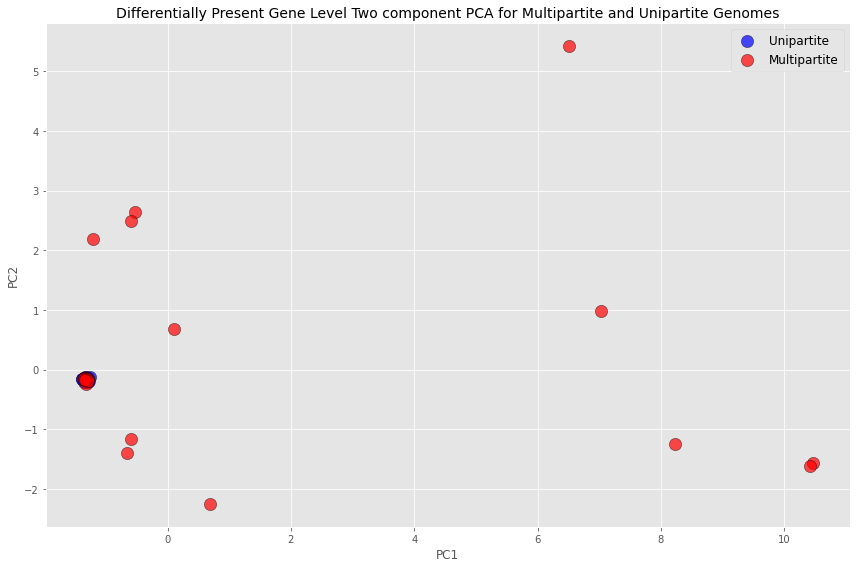

In [45]:
level = 'DEG_Level'
caption = 'Differentially Present Gene Level'

# import matrix for Differentially Present Level
file_name = 'https://github.com/Janaksunuwar/Predicting-Multipartite-and-Unipartite-Bacterial-Genomes/raw/main/Data/Final_Multipartite_matrix_DEG_level.csv'

PCA(level, caption, file_name)

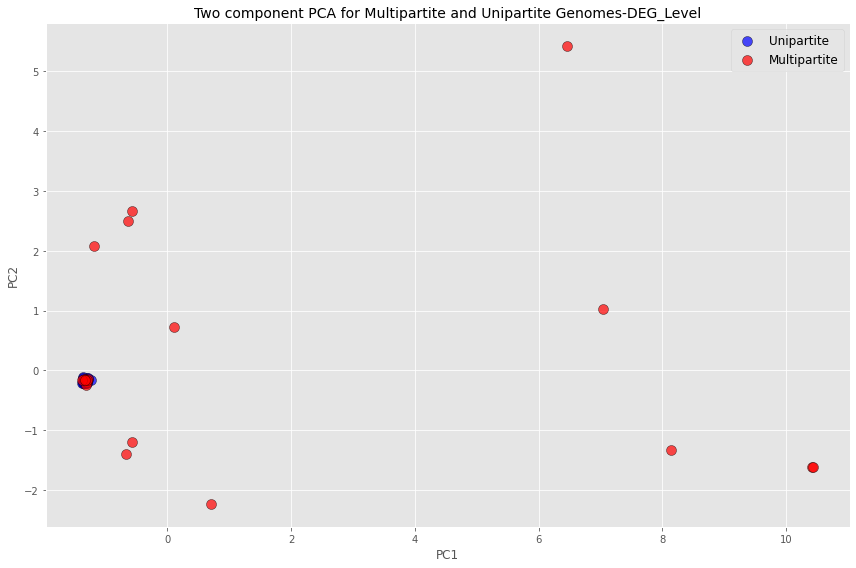

In [35]:
level = 'DEG_Level'
# import matrix for Differentially Present Level
file_name = 'https://github.com/Janaksunuwar/Predicting-Multipartite-and-Unipartite-Bacterial-Genomes/raw/main/Data/Final_Multipartite_matrix_DEG_level.csv'

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

consistent_genes = f'https://github.com/Janaksunuwar/Predicting-Multipartite-and-Unipartite-Bacterial-Genomes/raw/main/Data/2.Final_Consistent_Genes_Multipartite_{level}.csv'
#read gene_ast matrix
open_gene_ast = pd.read_csv(file_name)
# read file to dataframe
open_consistent_genes = pd.read_csv(consistent_genes)

# make separate dataframe with just consistent genes
target_genesTT = open_consistent_genes[['Feature']].rename(columns={'Feature': 'Consistent genes'})

#No of top consistent genes
num = 15
target_genesTT = target_genesTT.iloc[:num, :]

# sort the consistent genes 
target_genesTT = target_genesTT.sort_values('Consistent genes')
# adding antibiotic lable at the end
target_genes_good = target_genesTT.append({'Consistent genes': 'Label'}, ignore_index=True)
# converting consistent genes to a list
column_list = target_genes_good['Consistent genes'].tolist()

#ALL DATA
#make gene, ast matrix consisting only of consistent genes 
data = open_gene_ast[column_list]

# Separating out the features and labels
features = data.columns[:-1]
x = data.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# Define 2 compnents
pca = PCA(n_components=2)

# Apply PCA
principalComponents = pca.fit_transform(x)

# Convert to DataFrame
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Concatenate with target label
finalDf = pd.concat([principalDf, data[['Label']]], axis=1)

# Adding a small jitter to data
def jitter(data, amount=0.03):
    return data + np.random.randn(*data.shape) * amount

finalDf['Jittered_PC1'] = jitter(finalDf['PC1'])
finalDf['Jittered_PC2'] = jitter(finalDf['PC2'])

# The rest remains the same, but plot using the jittered data
plt.figure(figsize=(12,8))
for label in [0, 1]:
    idx_to_keep = (finalDf['Label'] == label)
    plt.scatter(finalDf.loc[idx_to_keep, 'Jittered_PC1'], 
                finalDf.loc[idx_to_keep, 'Jittered_PC2'], 
                c = colors[label], 
                s = 100, 
                label = labels_map[label], 
                edgecolors='k', 
                alpha=0.7)

# Setting labels and title
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.title(f'Two component PCA for Multipartite and Unipartite Genomes-{level}', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()



# # Set plot style for better visualization
# plt.style.use('ggplot')

# # Create a color map
# colors = {0:'blue', 1:'red'}
# labels_map = {0:'Unipartite', 1:'Multipartite'}

# # Plotting
# plt.figure(figsize=(12,8))
# for label in [0, 1]:
#     idx_to_keep = (finalDf['Label'] == label)
#     plt.scatter(finalDf.loc[idx_to_keep, 'PC1'], 
#                 finalDf.loc[idx_to_keep, 'PC2'], 
#                 c = colors[label], 
#                 s = 100, 
#                 label = labels_map[label], 
#                 edgecolors='k')

# # Setting labels and title
# plt.xlabel('PC1', fontsize=12)
# plt.ylabel('PC2', fontsize=12)
# plt.title(f'Two component PCA for Multipartite and Unipartite Genomes-{level}', fontsize=14)
# plt.legend(fontsize=12)
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [25]:
finalDf

,PC1,PC2,Label
0,-1.216067,2.113541,1
1,-1.325723,-0.171780,0
2,0.143529,0.728546,1
3,-1.325723,-0.171780,0
4,-0.552976,2.671923,1
5,-1.325723,-0.171780,0
6,8.175580,-1.256563,1
7,-1.325723,-0.171780,0
8,10.454196,-1.579092,1
9,-1.325723,-0.171780,0


In [24]:
principalDf

,PC1,PC2
0,-1.216067,2.113541
1,-1.325723,-0.171780
2,0.143529,0.728546
3,-1.325723,-0.171780
4,-0.552976,2.671923
5,-1.325723,-0.171780
6,8.175580,-1.256563
7,-1.325723,-0.171780
8,10.454196,-1.579092
9,-1.325723,-0.171780


In [26]:
data

,"2-C-methyl-D-erythritol 2,4-cyclodiphosphate synthase",2-C-methyl-D-erythritol 4-phosphate cytidylyltransferase,GntR family transcriptional regulator,PAS domain-containing protein,acetolactate synthase,cell envelope biogenesis protein TolA,chemotaxis protein,chemotaxis protein CheD,flagellar M-ring protein FliF,hybrid sensor histidine kinase/response regulator,porin,short-chain dehydrogenase,sugar ABC transporter permease,sugar ABC transporter substrate-binding protein,transcriptional regulator,Label
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


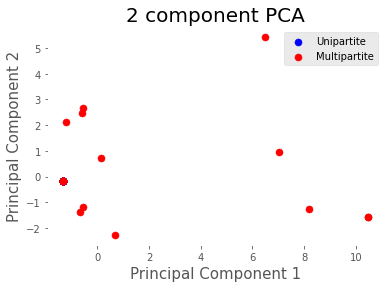

In [34]:
level = 'DEG_Level'
# import matrix for Differentially Present Level
file_name = 'https://github.com/Janaksunuwar/Predicting-Multipartite-and-Unipartite-Bacterial-Genomes/raw/main/Data/Final_Multipartite_matrix_DEG_level.csv'

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

consistent_genes = f'https://github.com/Janaksunuwar/Predicting-Multipartite-and-Unipartite-Bacterial-Genomes/raw/main/Data/2.Final_Consistent_Genes_Multipartite_{level}.csv'
#read gene_ast matrix
open_gene_ast = pd.read_csv(file_name)
# read file to dataframe
open_consistent_genes = pd.read_csv(consistent_genes)

# make separate dataframe with just consistent genes
target_genesTT = open_consistent_genes[['Feature']].rename(columns={'Feature': 'Consistent genes'})

#No of top consistent genes
num = 15
target_genesTT = target_genesTT.iloc[:num, :]

# sort the consistent genes 
target_genesTT = target_genesTT.sort_values('Consistent genes')
# adding antibiotic lable at the end
target_genes_good = target_genesTT.append({'Consistent genes': 'Label'}, ignore_index=True)
# converting consistent genes to a list
column_list = target_genes_good['Consistent genes'].tolist()

#ALL DATA
#make gene, ast matrix consisting only of consistent genes 
data = open_gene_ast[column_list]
data

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df=data

# Separating out the features
x = df.drop('Label', axis=1).values

# Separating out the target
y = df['Label'].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# PCA projection to 2D
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Concatenate with target label
finalDf = pd.concat([principalDf, df[['Label']]], axis=1)

# Visualize 2D Projection
fig, ax = plt.subplots()

# Set the background color
fig.set_facecolor('white')
ax.set_facecolor('white')

targets = [0, 1]
colors = ['b', 'r']
names = ['Unipartite', 'Multipartite']

for target, color, name in zip(targets, colors, names):
    indicesToKeep = finalDf['Label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], finalDf.loc[indicesToKeep, 'PC2'], c=color, s=50, label=name)

ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
ax.legend()
ax.grid(False)  # Remove grid lines

# Save the figure with 300 dpi
plt.savefig("PCA_plot.png", dpi=300, bbox_inches='tight')

plt.show()
